# Importing Libraries

In [45]:
import pandas as pd
from textblob import TextBlob
from sklearn.metrics import classification_report, accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk

# Reading the Data from file

In [46]:
# Define the file path
file_path = "/Users/sanketnagshetti/Desktop/AI/SentimentalAnalysis/British_Airline_Reviews.csv"

# Read the CSV file into a pandas DataFrame
try:
    data = pd.read_csv(file_path)
    print("File loaded successfully.")
    print(data.head())  # Display the first few rows of the dataset
except FileNotFoundError:
    print("File not found. Please check the path and try again.")
except Exception as e:
    print(f"An error occurred: {e}")


File loaded successfully.
   Unnamed: 0  OverallRating                              ReviewHeader  \
0           0            1.0    "Service level far worse then Ryanair"   
1           1            3.0  "do not upgrade members based on status"   
2           2            8.0             "Flight was smooth and quick"   
3           3            1.0             "Absolutely hopeless airline"   
4           4            1.0        "Customer Service is non existent"   

               Name            Datetime  VerifiedReview  \
0           L Keele  19th November 2023            True   
1      Austin Jones  19th November 2023            True   
2        M A Collie  16th November 2023           False   
3        Nigel Dean  16th November 2023            True   
4  Gaylynne Simpson  14th November 2023           False   

                                          ReviewBody TypeOfTraveller  \
0  4 Hours before takeoff we received a Mail stat...  Couple Leisure   
1  I recently had a delay on B

# Remove unnecessary columns and 

In [48]:
# Select and rename the columns, and combine ReviewHeader and ReviewBody
data_transformed = data[['Route', 'Aircraft', 'SeatType', 'TypeOfTraveller', 'ReviewHeader', 'ReviewBody']].copy()
data_transformed['Review'] = data_transformed['ReviewHeader'] + " " + data_transformed['ReviewBody']  # Combine ReviewHeader and ReviewBody

# Drop unnecessary columns (ReviewHeader and ReviewBody as they are combined into Review)
data_transformed.drop(columns=['ReviewHeader', 'ReviewBody'], inplace=True)

# Transformed Dataframe

In [49]:
data_transformed.head(5)

,Route,Aircraft,SeatType,TypeOfTraveller,Review
0,London to Stuttgart,NaN,Economy Class,Couple Leisure,"""Service level far worse then Ryanair"" 4 Hours..."
1,Brussels to London,A320,Economy Class,Business,"""do not upgrade members based on status"" I rec..."
2,London Heathrow to Dublin,A320,Business Class,Couple Leisure,"""Flight was smooth and quick"" Boarded on time,..."
3,London to Dublin,NaN,Economy Class,Couple Leisure,"""Absolutely hopeless airline"" 5 days before th..."
4,London to Lisbon,NaN,Economy Class,Couple Leisure,"""Customer Service is non existent"" We traveled..."


# Download necessary NLTK resources

In [14]:
# Download necessary NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sanketnagshetti/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/sanketnagshetti/nltk_data...
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/sanketnagshetti/nltk_data...


True

# Transformed the data Vectorization and Lemmatization

In [50]:
# Load stopwords
stop_words = set(stopwords.words('english'))
# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()
# Step 2: Vectorization (Convert text to feature vectors)
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data_transformed['CleanedReview'])
# Step 1: Preprocessing (Cleaning + Lemmatization)
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove special characters and digits
    text = ''.join([char for char in text if char.isalpha() or char.isspace()])
    # Tokenization (split by space)
    tokens = text.split()
    # Remove stopwords and lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

In [52]:
data_transformed['CleanedReview'] = data_transformed['Review'].apply(preprocess_text)

# Applying Sentiment Analysis using TextBlob

In [54]:
# Step 3: Sentiment Analysis using TextBlob
def analyze_sentiment(text):
    polarity = TextBlob(text).sentiment.polarity
    positive_score = max(0, polarity)  # If polarity is positive, use it as the score
    negative_score = max(0, -polarity)  # If polarity is negative, use the absolute value as the score
    
    # Assign sentiment labels based on polarity
    if polarity < 0:
        sentiment = 'Negative'
    elif 0 <= polarity <= 0.2:
        sentiment = 'Neutral'
    else:
        sentiment = 'Positive'

    return sentiment, positive_score, negative_score

In [67]:
sentiments = data_transformed['CleanedReview'].apply(analyze_sentiment)
# Assign the resulting sentiment and polarity into separate columns
data_transformed['PredictedSentiment'] = sentiments.apply(lambda x: x[0])
data_transformed['PolarityScore'] = sentiments.apply(lambda x: round(x[1], 2))

# Dataframe After sentimental Analysis

In [72]:
data_transformed.head(5)

,Route,Aircraft,SeatType,TypeOfTraveller,Review,CleanedReview,PredictedSentiment,PolarityScore
0,London to Stuttgart,NaN,Economy Class,Couple Leisure,"""Service level far worse then Ryanair"" 4 Hours...",service level far worse ryanair hour takeoff r...,Negative,0.00
1,Brussels to London,A320,Economy Class,Business,"""do not upgrade members based on status"" I rec...",upgrade member based status recently delay bri...,Neutral,0.01
2,London Heathrow to Dublin,A320,Business Class,Couple Leisure,"""Flight was smooth and quick"" Boarded on time,...",flight smooth quick boarded time took age get ...,Neutral,0.18
3,London to Dublin,NaN,Economy Class,Couple Leisure,"""Absolutely hopeless airline"" 5 days before th...",absolutely hopeless airline day flight advised...,Neutral,0.12
4,London to Lisbon,NaN,Economy Class,Couple Leisure,"""Customer Service is non existent"" We traveled...",customer service non existent traveled lisbon ...,Neutral,0.14


# Export the final Data into CSV file

In [74]:
destination_path = "/Users/sanketnagshetti/Desktop/AI/SentimentalAnalysis/sentimental_analysis_british_airline_reviews.csv"

# Export dataframe to CSV
data_transformed.to_csv(destination_path, index=False)


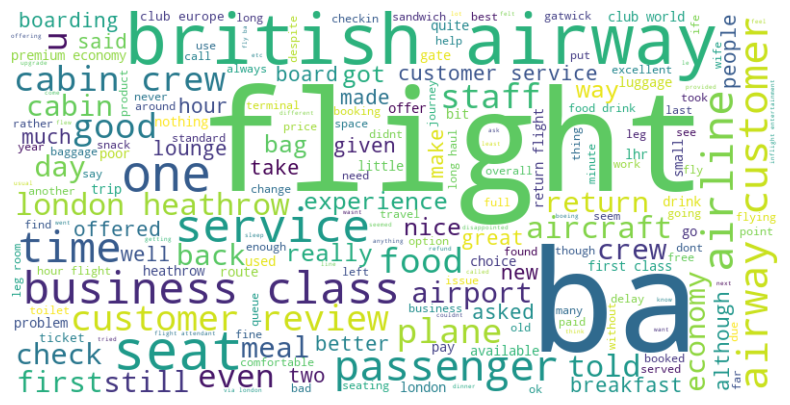

In [76]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all reviews from the 'CleanedReview' column into a single string
text = " ".join(data_transformed['CleanedReview'].dropna())

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # No axes for the word cloud
plt.show()
